In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f=lambda x:1/x-2
x=np.linspace(0.2,2,100)
fx=f(x)
y0=[0]*len(x)

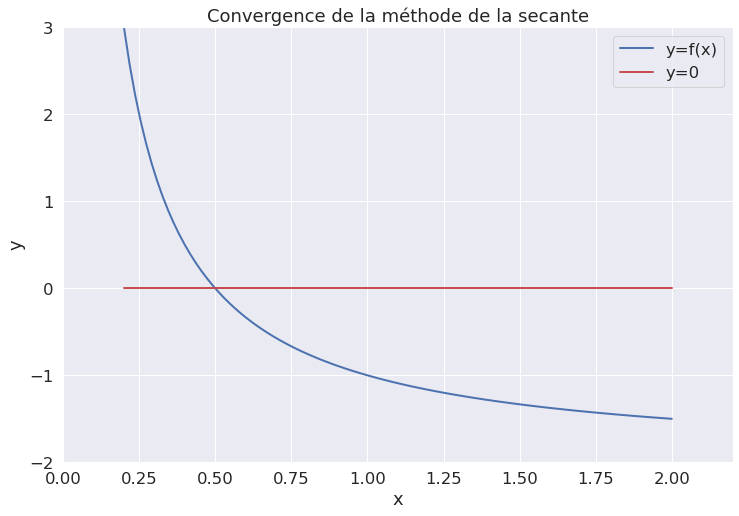

In [3]:
# create a figure and axes
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(1,1,1)   
# set up the subplots as needed
ax1.set_xlim(( 0, 2.2))            
ax1.set_ylim((-2, 3))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
#fixed
line1, = ax1.plot(x, fx, 'b', lw=2)
line2, = ax1.plot(x, [0]*len(x), 'r', lw=2)
lignes,=ax1.plot([],[],'')
pt1, = ax1.plot([],[], 'ro', ms=10)
# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('Convergence de la méthode de la secante')
ax1.legend(['y=f(x)','y=0'])

In [4]:
#Le model la secante
def secante(f,a,b):
    x0=a
    x1=b
    while True:
        x2=(x1*f(x0)-x0*f(x1))/(f(x0)-f(x1))
        yield x2
        if f(x2)*(x0)<=0:
            x1=x2
        else:
            x0=x2
        if f(x2)==0:
            break

In [5]:
(a,b)=(0.21,2)

sec=secante(f,a,b)
xn_sec=[]
xnn=secante(f,a,b)
try:
    for i in range(100):
        alpha_sec=next(sec)
        xn_sec.append(alpha_sec)
        #print(str(i)+"  "+str(alpha_sec))
except:
    pass

In [6]:
# animation function. This is called sequentially
c=a
def drawframe_lasecante(n):
    fig.clear
    if n==0:
        ax1.plot(a,f(a),'ro')
        ax1.plot(b,f(b),'ro')
        ax1.plot([a,b],[f(a),f(b)],'--')
    else:
        ax1.plot([xn_sec[n-1],xn_sec[n]],[f(xn_sec[n-1]),f(xn_sec[n])],'--')
        pt1.set_data(xn_sec[:n],y0[:n])
        ax1.plot([xn_sec[n-1],xn_sec[n-1]],[0,f(xn_sec[n-1])],'--')
    txt_title = ax1.set_title('Méthode de la secante: frame {}'.format(n))
    return (line1,line2)

In [7]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe_lasecante, frames=15, interval=1500, blit=True)

In [8]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [9]:
#anim.save("/home/zouhair/Desktop/animation.mp4")

Remarque pour construire les lignes de constructions utilise l'opérateur shuffle $$x\pm y$$